<a href="https://colab.research.google.com/github/RitaROK/Analysis/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.unumpy as unp 
import scipy

def get_color(n, basecolor):
  current_palette = sns.dark_palette(n_colors=n, color=basecolor)
  sns.palplot(current_palette)
  colors = np.zeros(n, dtype=object)
  for color in range(n):
    colors[color] = current_palette[color]
  return colors

In [ ]:
#@title Load Supercluster Dataframe
sc = pd.read_csv('/content/drive/MyDrive/LIME/sc.csv')
display(sc.describe())
roi=sc

print('Size of the original dataset:', sc.shape[0])

,z[cm],Hits,Integral,Length,Width,Slim,PathLen,CorrIntegral,xMax,xMin,...,LRMS,LAmp,LMean,LSigma,Long_RMS,MAmp,MFWHM,MMean,MProm,Pixel
count,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1283464.0,1.283464e+06,1.283464e+06,1.283464e+06,...,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06,1.283464e+06
mean,2.321602e+01,8.694565e+02,1.250366e+04,1.231868e+02,2.951519e+01,5.927929e-01,-1.0,4.777804e+04,1.310779e+03,1.220227e+03,...,3.183085e+01,5.630396e+14,5.714476e+01,8.683310e+01,3.185427e+01,1.566549e+02,-3.543946e+02,-2.567898e+02,1.012956e+02,3.590918e+03
std,1.388814e+01,1.694187e+03,2.487104e+04,2.151508e+02,2.941447e+01,2.782035e-01,0.0,1.490269e+06,6.492391e+02,6.533669e+02,...,6.020020e+01,4.950543e+17,1.184984e+02,2.691368e+02,6.020454e+01,1.102213e+03,4.811308e+02,5.872470e+02,1.069376e+03,6.118020e+03
min,0.000000e+00,0.000000e+00,-1.144409e+02,7.000000e+00,3.000000e+00,7.216300e-03,-1.0,7.714033e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,-4.107197e+16,-2.383382e+04,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-1.000000e+00
25%,1.000000e+01,4.600000e+01,5.431467e+02,1.900000e+01,1.296919e+01,4.285714e-01,-1.0,1.888106e+03,7.110000e+02,6.080000e+02,...,3.994857e+00,1.587448e+02,8.518652e+00,4.553354e+00,4.043292e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-1.000000e+00
50%,2.500000e+01,2.590000e+02,4.013274e+03,3.605702e+01,2.549140e+01,6.621438e-01,-1.0,1.315401e+04,1.367000e+03,1.248000e+03,...,6.280232e+00,2.326733e+02,1.721907e+01,6.989790e+00,6.297063e+00,3.158006e+02,2.793365e+00,1.650000e+01,2.370568e+02,-1.000000e+00
75%,3.500000e+01,5.920000e+02,9.785621e+03,7.463241e+01,3.485291e+01,8.001017e-01,-1.0,3.622709e+04,1.927000e+03,1.832000e+03,...,1.740036e+01,7.880071e+02,3.211582e+01,2.311064e+01,1.742346e+01,9.628175e+02,4.830321e+00,4.850000e+01,8.594882e+02,5.824000e+03
max,4.500000e+01,5.267400e+04,3.504739e+06,2.228139e+03,8.949844e+02,1.445530e+00,-1.0,1.626909e+09,2.211000e+03,2.204000e+03,...,9.936965e+02,5.252869e+20,2.087952e+03,7.417885e+03,9.936888e+02,4.709745e+05,7.759003e+01,2.218500e+03,4.705996e+05,3.668800e+04


Size of the original dataset: 1283464


In [ ]:
#@title RoI Cutting Function

def cut_roi(data, Variable, nbin, Max, Min, Ymax, cutmin, cutmax):
  color = get_color(9, 'tab:orange')
  fig, (ax) = plt.subplots(figsize=(16,9), dpi= 80, facecolor='w', edgecolor='k') 
  i=0
  for dist in [5, 10, 15, 20, 25, 30, 35, 40, 45]:
    ax.hist(data[Variable].loc[(data['z[cm]']==dist) & (data[Variable]<Max)& (data[Variable]>Min)], bins=nbin, histtype='step', lw=1, color=color[i])
    i=i+1

  ax.hist(data[Variable].loc[(data['z[cm]']==0) & (data[Variable]<Max)& (data[Variable]>Min)], bins=nbin, color='darkgray', zorder=5)
  ax.set_ylim(0,Ymax)
  ax.spines["right"].set_visible(False)
  ax.spines["top"].set_visible(False)
  ax.set_ylabel('Number of clusters', y=0.5, ha='center', fontsize=24)
  ax.tick_params(axis='both', which='major', labelsize=24)
  ax.set_xlabel(Variable, x=0.5, ha='center', fontsize=24)
  ax.axvline(x=Min, color='k', lw=2, zorder=5)
  ax.set_xlim(data[Variable].min(),Max)
  plt.show() 
  roi = data.loc[(data[Variable]>=cutmin) & (data[Variable]<=cutmax)]
  print('To determine the RoI,', data.shape[0]-roi.shape[0], 'clusters were eliminated.')
  return roi

# Identification of the CoIs (Clusters of Interest)

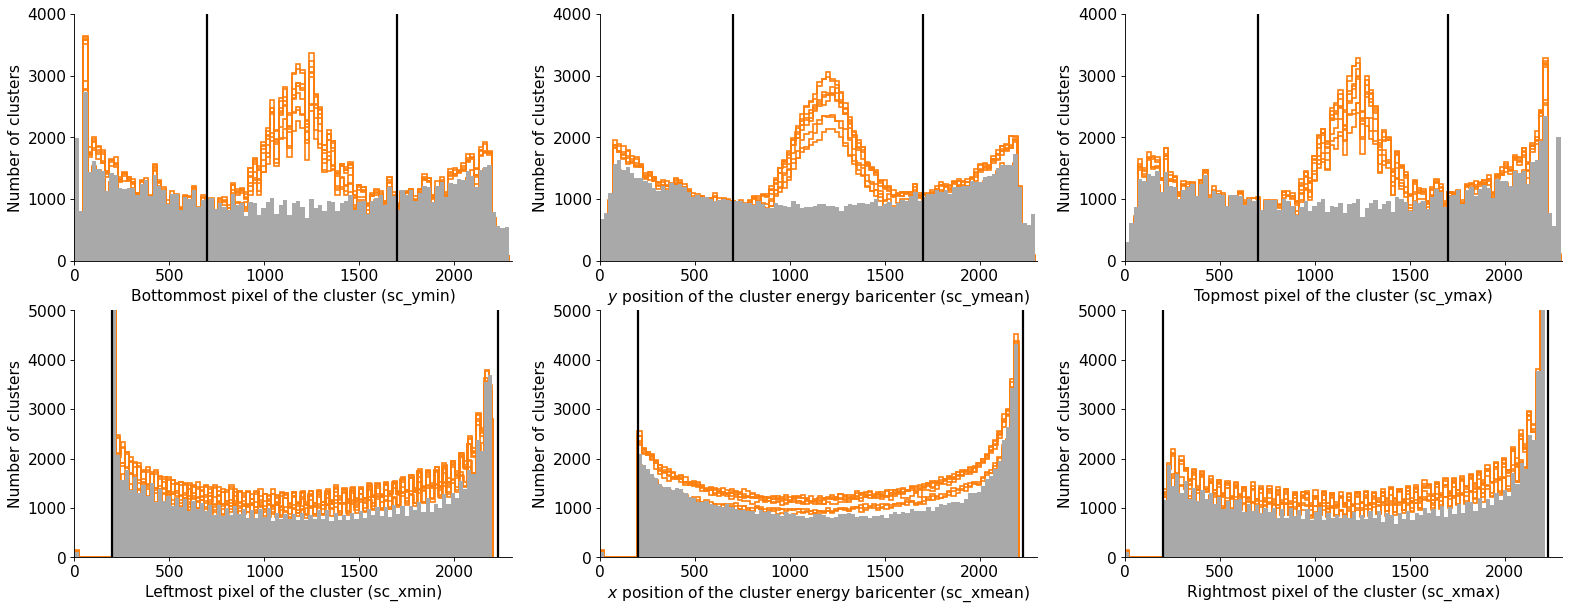

To determine the RoI, 707011 clusters were eliminated.


In [ ]:
#@title **Spatial CoIs**

#@markdown The surviving clusters have $700<y<1700$ and $200<x<2230$

fig, (ax) = plt.subplots(2,3, figsize=(24, 9), dpi= 80, facecolor='w', edgecolor='k') 

ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==5], bins=100, histtype='step', lw=1.5, label='Z = 6.5 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==10], bins=100, histtype='step', lw=1.5, label='Z = 11 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==15], bins=100, histtype='step', lw=1.5, label='Z = 16 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==20], bins=100, histtype='step', lw=1.5, label='Z = 21 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==25], bins=100, histtype='step', lw=1.5, label='Z = 26 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==30], bins=100, histtype='step', lw=1.5, label='Z = 31 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==35], bins=100, histtype='step', lw=1.5, label='Z = 36 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==40], bins=100, histtype='step', lw=1.5, label='Z = 41 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==45], bins=100, histtype='step', lw=1.5, label='Z = 46 cm', color='tab:orange')
ax[0][0].hist(sc['yMin'].loc[sc['z[cm]']==0], bins=100, histtype='stepfilled', lw=1.5, label='Z = 50 cm', color='darkgray')
ax[0][0].spines["right"].set_visible(False)
ax[0][0].spines["top"].set_visible(False)
ax[0][0].set_ylabel('Number of clusters', y=0.5, ha='center', fontsize=14)
ax[0][0].tick_params(axis='both', which='major', labelsize=14)
ax[0][0].set_xlim(0,2304)
ax[0][0].set_ylim(0,4000)
ax[0][0].set_xlabel('Bottommost pixel of the cluster (sc_ymin)', x=0.5, ha='center', fontsize=14)

ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==5], bins=100, histtype='step', lw=1.5, label='Z = 6.5 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==10], bins=100, histtype='step', lw=1.5, label='Z = 11 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==15], bins=100, histtype='step', lw=1.5, label='Z = 16 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==20], bins=100, histtype='step', lw=1.5, label='Z = 21 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==25], bins=100, histtype='step', lw=1.5, label='Z = 26 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==30], bins=100, histtype='step', lw=1.5, label='Z = 31 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==35], bins=100, histtype='step', lw=1.5, label='Z = 36 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==40], bins=100, histtype='step', lw=1.5, label='Z = 41 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==45], bins=100, histtype='step', lw=1.5, label='Z = 46 cm', color='tab:orange')
ax[0][1].hist(sc['yMean'].loc[sc['z[cm]']==0], bins=100, histtype='stepfilled', lw=1.5, label='Z = 50 cm', color='darkgray')
ax[0][1].spines["right"].set_visible(False)
ax[0][1].spines["top"].set_visible(False)
ax[0][1].set_ylabel('Number of clusters', y=0.5, ha='center', fontsize=14)
ax[0][1].tick_params(axis='both', which='major', labelsize=14)
ax[0][1].set_xlim(0,2304)
ax[0][1].set_ylim(0,4000)
ax[0][1].set_xlabel('$y$ position of the cluster energy baricenter (sc_ymean)', x=0.5, ha='center', fontsize=14)

ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==5], bins=100, histtype='step', lw=1.5, label='Z = 6.5 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==10], bins=100, histtype='step', lw=1.5, label='Z = 11 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==15], bins=100, histtype='step', lw=1.5, label='Z = 16 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==20], bins=100, histtype='step', lw=1.5, label='Z = 21 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==25], bins=100, histtype='step', lw=1.5, label='Z = 26 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==30], bins=100, histtype='step', lw=1.5, label='Z = 31 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==35], bins=100, histtype='step', lw=1.5, label='Z = 36 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==40], bins=100, histtype='step', lw=1.5, label='Z = 41 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==45], bins=100, histtype='step', lw=1.5, label='Z = 46 cm', color='tab:orange')
ax[0][2].hist(sc['yMax'].loc[sc['z[cm]']==0], bins=100, histtype='stepfilled', lw=1.5, label='Z = 50 cm', color='darkgray')
ax[0][2].spines["right"].set_visible(False)
ax[0][2].spines["top"].set_visible(False)
ax[0][2].set_ylabel('Number of clusters', y=0.5, ha='center', fontsize=14)
ax[0][2].tick_params(axis='both', which='major', labelsize=14)
ax[0][2].set_xlim(0,2304)
ax[0][2].set_ylim(0,4000)
ax[0][2].set_xlabel('Topmost pixel of the cluster (sc_ymax)', x=0.5, ha='center', fontsize=14)

ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==5], bins=100, histtype='step', lw=1.5, label='Z = 6.5 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==10], bins=100, histtype='step', lw=1.5, label='Z = 11 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==15], bins=100, histtype='step', lw=1.5, label='Z = 16 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==20], bins=100, histtype='step', lw=1.5, label='Z = 21 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==25], bins=100, histtype='step', lw=1.5, label='Z = 26 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==30], bins=100, histtype='step', lw=1.5, label='Z = 31 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==35], bins=100, histtype='step', lw=1.5, label='Z = 36 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==40], bins=100, histtype='step', lw=1.5, label='Z = 41 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==45], bins=100, histtype='step', lw=1.5, label='Z = 46 cm', color='tab:orange')
ax[1][0].hist(sc['xMin'].loc[sc['z[cm]']==0], bins=100, histtype='stepfilled', lw=1.5, label='Z = 50 cm', color='darkgray')
ax[1][0].spines["right"].set_visible(False)
ax[1][0].spines["top"].set_visible(False)
ax[1][0].set_ylabel('Number of clusters', y=0.5, ha='center', fontsize=14)
ax[1][0].tick_params(axis='both', which='major', labelsize=14)
ax[1][0].set_xlim(0,2304)
ax[1][0].set_ylim(0,5000)
ax[1][0].set_xlabel('Leftmost pixel of the cluster (sc_xmin)', x=0.5, ha='center', fontsize=14)

ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==5], bins=100, histtype='step', lw=1.5, label='Z = 6.5 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==10], bins=100, histtype='step', lw=1.5, label='Z = 11 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==15], bins=100, histtype='step', lw=1.5, label='Z = 16 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==20], bins=100, histtype='step', lw=1.5, label='Z = 21 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==25], bins=100, histtype='step', lw=1.5, label='Z = 26 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==30], bins=100, histtype='step', lw=1.5, label='Z = 31 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==35], bins=100, histtype='step', lw=1.5, label='Z = 36 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==40], bins=100, histtype='step', lw=1.5, label='Z = 41 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==45], bins=100, histtype='step', lw=1.5, label='Z = 46 cm', color='tab:orange')
ax[1][1].hist(sc['xMean'].loc[sc['z[cm]']==0], bins=100, histtype='stepfilled', lw=1.5, label='Z = 50 cm', color='darkgray')
ax[1][1].spines["right"].set_visible(False)
ax[1][1].spines["top"].set_visible(False)
ax[1][1].set_ylabel('Number of clusters', y=0.5, ha='center', fontsize=14)
ax[1][1].tick_params(axis='both', which='major', labelsize=14)
ax[1][1].set_xlim(0,2304)
ax[1][1].set_ylim(0,5000)
ax[1][1].set_xlabel('$x$ position of the cluster energy baricenter (sc_xmean)', x=0.5, ha='center', fontsize=14)

ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==5], bins=100, histtype='step', lw=1.5, label='Z = 6.5 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==10], bins=100, histtype='step', lw=1.5, label='Z = 11 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==15], bins=100, histtype='step', lw=1.5, label='Z = 16 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==20], bins=100, histtype='step', lw=1.5, label='Z = 21 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==25], bins=100, histtype='step', lw=1.5, label='Z = 26 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==30], bins=100, histtype='step', lw=1.5, label='Z = 31 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==35], bins=100, histtype='step', lw=1.5, label='Z = 36 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==40], bins=100, histtype='step', lw=1.5, label='Z = 41 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==45], bins=100, histtype='step', lw=1.5, label='Z = 46 cm', color='tab:orange')
ax[1][2].hist(sc['xMax'].loc[sc['z[cm]']==0], bins=100, histtype='stepfilled', lw=1.5, label='Z = 50 cm', color='darkgray')
ax[1][2].spines["right"].set_visible(False)
ax[1][2].spines["top"].set_visible(False)
ax[1][2].set_ylabel('Number of clusters', y=0.5, ha='center', fontsize=14)
ax[1][2].tick_params(axis='both', which='major', labelsize=14)
ax[1][2].set_xlim(0,2304)
ax[1][2].set_ylim(0,5000)
ax[1][2].set_xlabel('Rightmost pixel of the cluster (sc_xmax)', x=0.5, ha='center', fontsize=14)

ymin = 700
ymax = 1700
ax[0][0].axvline(x= ymin, color='k', lw=2)
ax[0][0].axvline(x= ymax, color='k', lw=2)
ax[0][1].axvline(x= ymin, color='k', lw=2)
ax[0][1].axvline(x= ymax, color='k', lw=2)
ax[0][2].axvline(x= ymin, color='k', lw=2)
ax[0][2].axvline(x= ymax, color='k', lw=2)

xmin = 200
xmax = 2230
ax[1][0].axvline(x= xmin, color='k', lw=2)
ax[1][0].axvline(x= xmax, color='k', lw=2)
ax[1][1].axvline(x= xmin, color='k', lw=2)
ax[1][1].axvline(x= xmax, color='k', lw=2)
ax[1][2].axvline(x= xmin, color='k', lw=2)
ax[1][2].axvline(x= xmax, color='k', lw=2)
plt.show()

roi = sc.loc[(sc['yMin']>ymin) & (sc['yMax']<ymax) & (sc['xMin']>xmin) & (sc['xMax']<xmax)]
print('To determine the RoI,', sc.shape[0]-roi.shape[0], 'clusters were eliminated.')
#display(roi.describe())

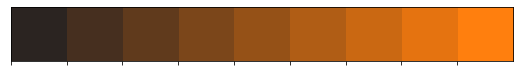

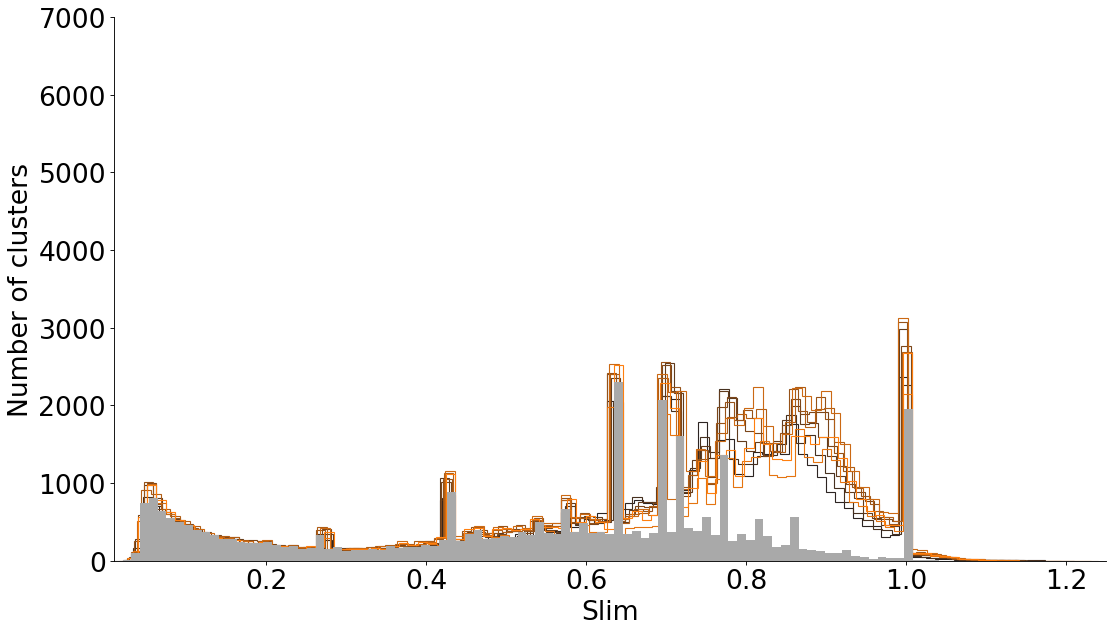

To determine the RoI, 164818 clusters were eliminated.


In [ ]:
#@title **Slimness CoIs**

#@markdown Because we know $^{55}$Fe spots are almost round, the surviving clusters have 0.6<sc_width/sc_length<1.
#@markdown Clusters with a slimness below 0.6 are elongated are are probably cosmic rays

roi = cut_roi(roi, 'Slim', 100, 1.25, 0, 7e3, 0.6, 1)

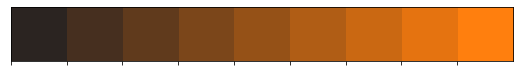

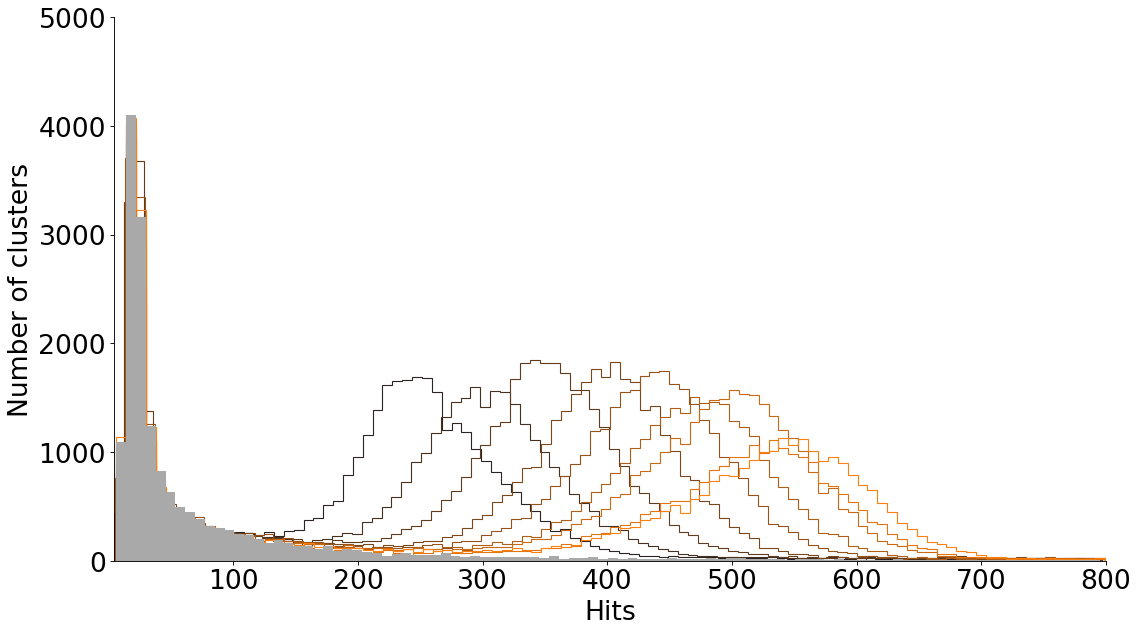

To determine the RoI, 125597 clusters were eliminated.


In [ ]:
#@title **Hits CoIs**

#@markdown The surviving clusters have 100 < sc_hits < 800.

#@markdown Clusters below this threshold (small clusters) are probably hotspots.

#@markdown Clusters above this threshold (big clusters) are probably cosmic rays.

roi = cut_roi(roi, 'Hits', 100, 800, 0, 5e3, 100, 800)

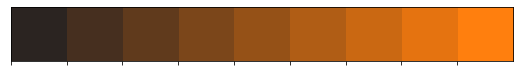

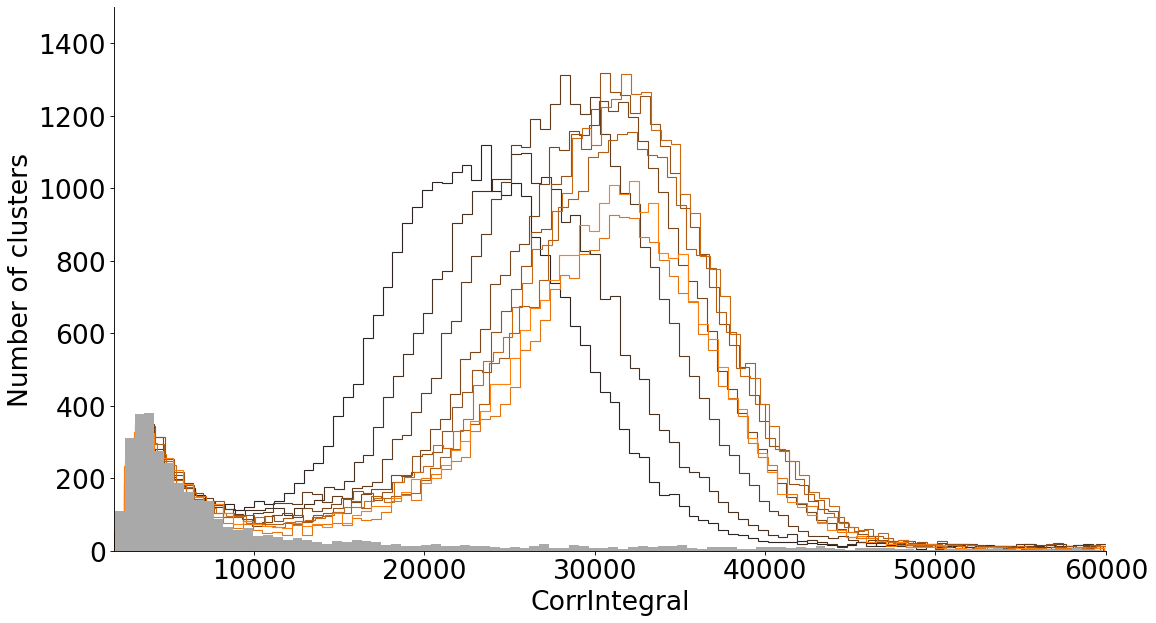

To determine the RoI, 19115 clusters were eliminated.


In [ ]:
#@title **Integral CoIs**

#@markdown The surviving clusters have $6\times 10^3<$CorrIntegral $<6\times 10^4$.

#@markdown Clusters with low light yield are probably other background signals.

#@markdown Clusters with very high light yield may be hotspots.

roi = cut_roi(roi, 'CorrIntegral', 100, 6e4, 0, 1500, 6e3, 6e4)

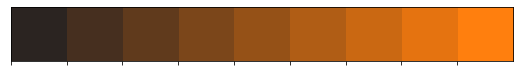

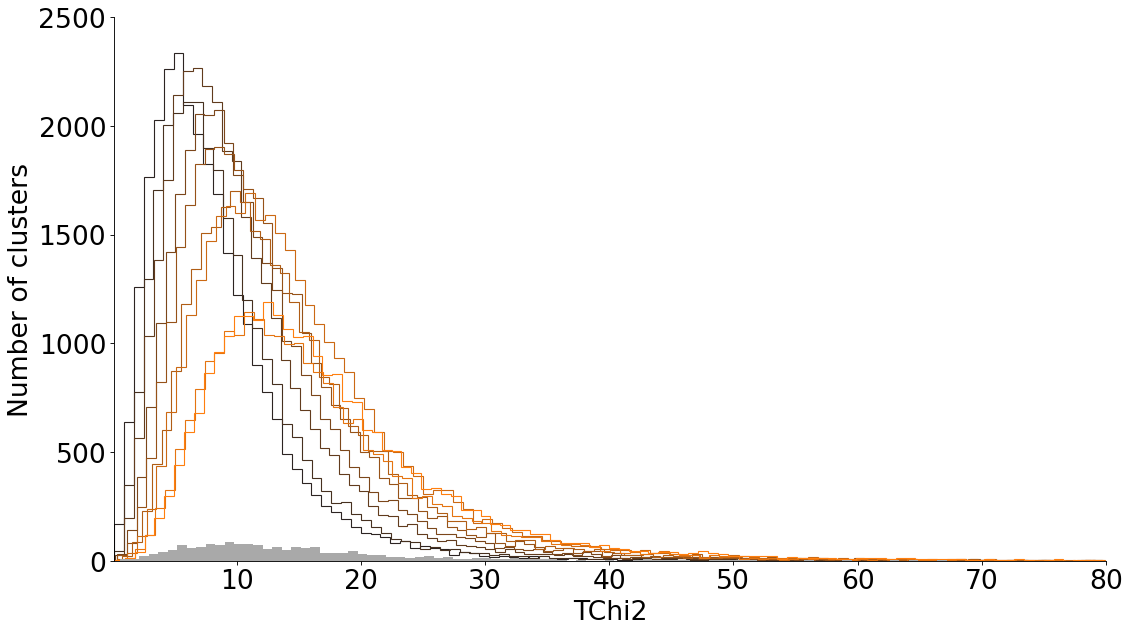

To determine the RoI, 233 clusters were eliminated.


In [ ]:
#@title **Transverse fit CoIs**

#@markdown The surviving clusters have $0<$TChi2 $<80$.

#@markdown Clusters with high $\chi^2$ values to the gaussian fit of the transverse profile are not well fitted and are not $^{55}$Fe spots.

roi = cut_roi(roi, 'TChi2', 100, 80, 0, 2500, 0, 80)

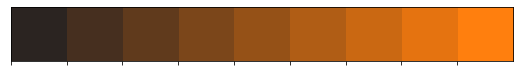

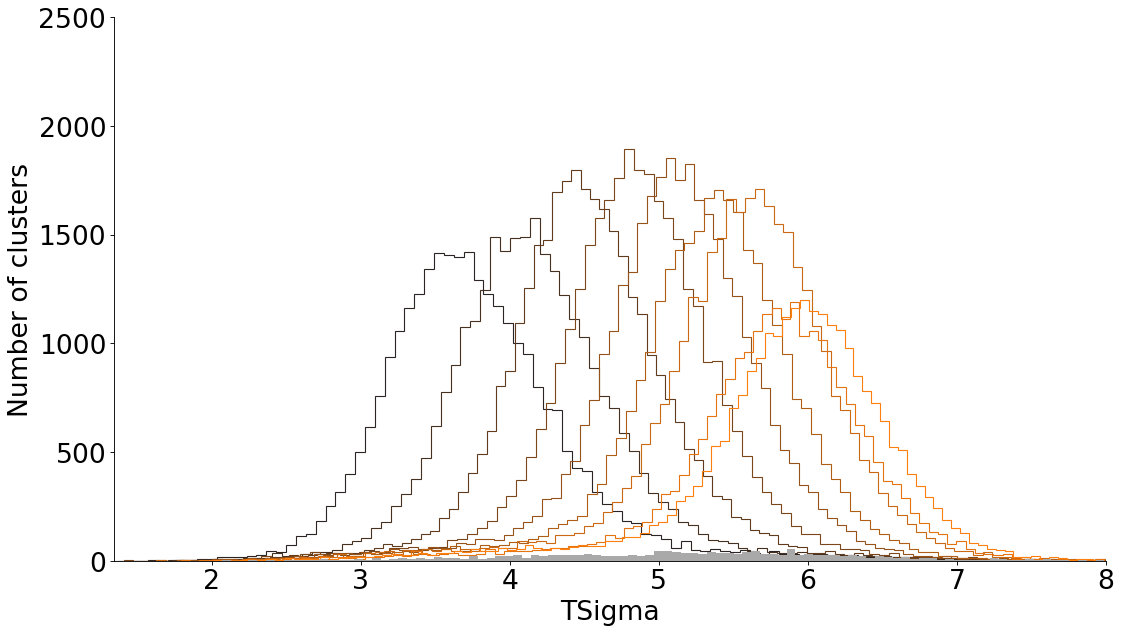

To determine the RoI, 336 clusters were eliminated.


In [ ]:
#@title **$\sigma_T$ CoIs**

#@markdown The surviving clusters have $0<\sigma_T <8$.

#@markdown Clusters with high $\sigma_T$ have too wide transverse profile to be $^{55}$Fe spots.

roi = cut_roi(roi, 'TSigma', 100, 8, 0, 2500, 0, 8)

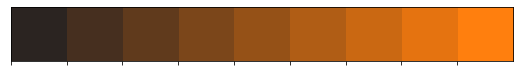

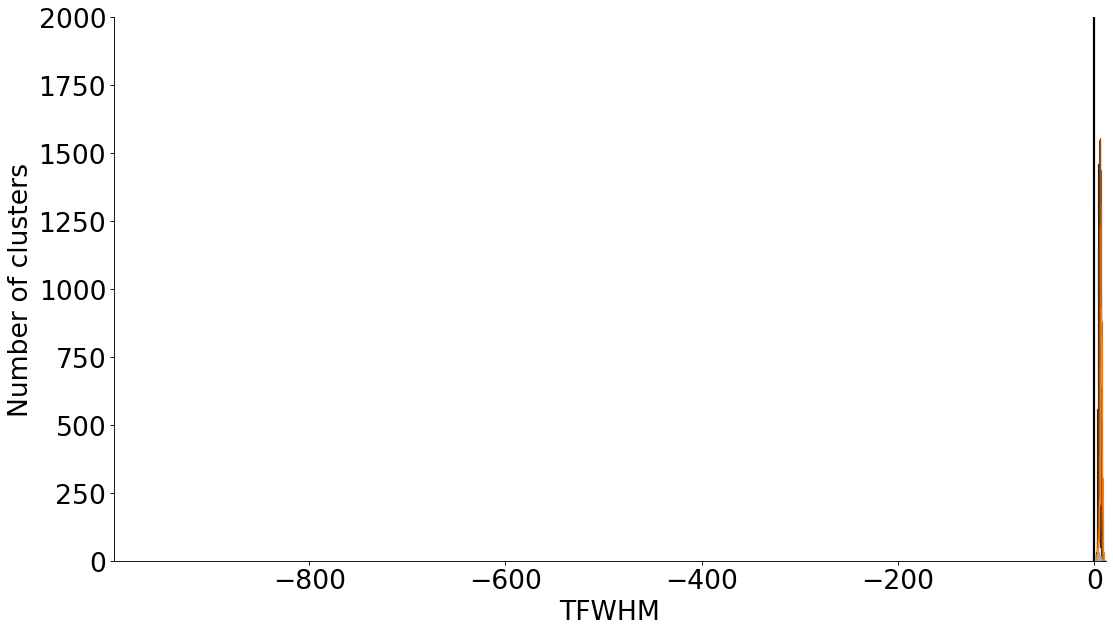

To determine the RoI, 751 clusters were eliminated.


In [ ]:
#@title **Transverse FWHM CoIs**

#@markdown The surviving clusters have $0<TFWHM <12$.

roi = cut_roi(roi, 'TFWHM', 100, 12, 0, 2000, 0, 12)

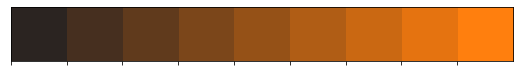

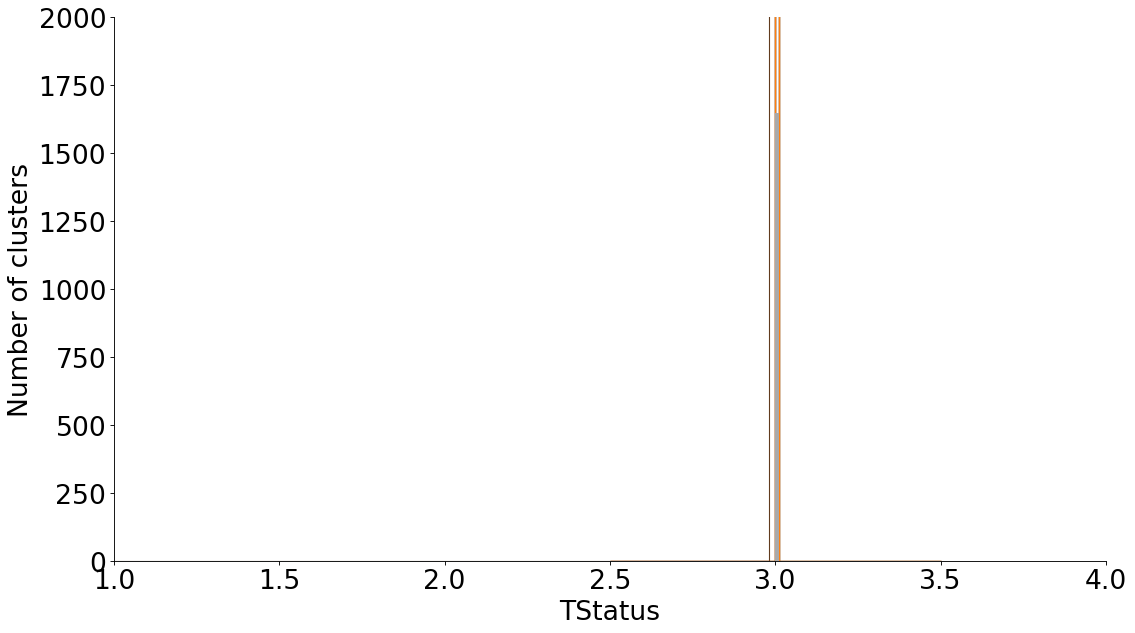

To determine the RoI, 1 clusters were eliminated.


In [ ]:
#@title **Status of the transverse gaussian fit**

#@markdown Only the clusters with this value at 3 were correctly fitted to a Gaussian Function.

roi = cut_roi(roi, 'TStatus', 100, 4, 0, 2000, 2.5, 3.5)

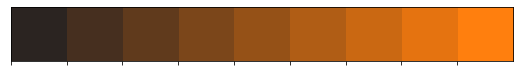

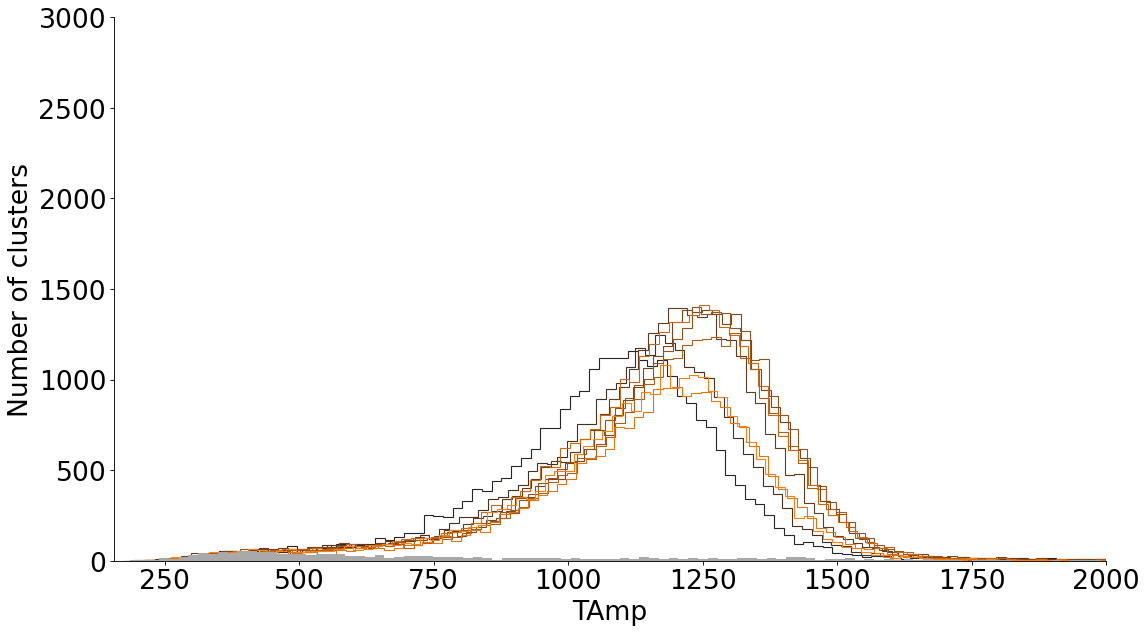

To determine the RoI, 404 clusters were eliminated.


In [ ]:
#@title **Transverse Amplitude**

#@markdown The surviving clusters have $500<TAmp<2000$.

roi = cut_roi(roi, 'TAmp', 100, 2000, 0, 3000, 0, 2000)

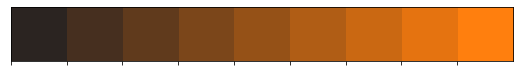

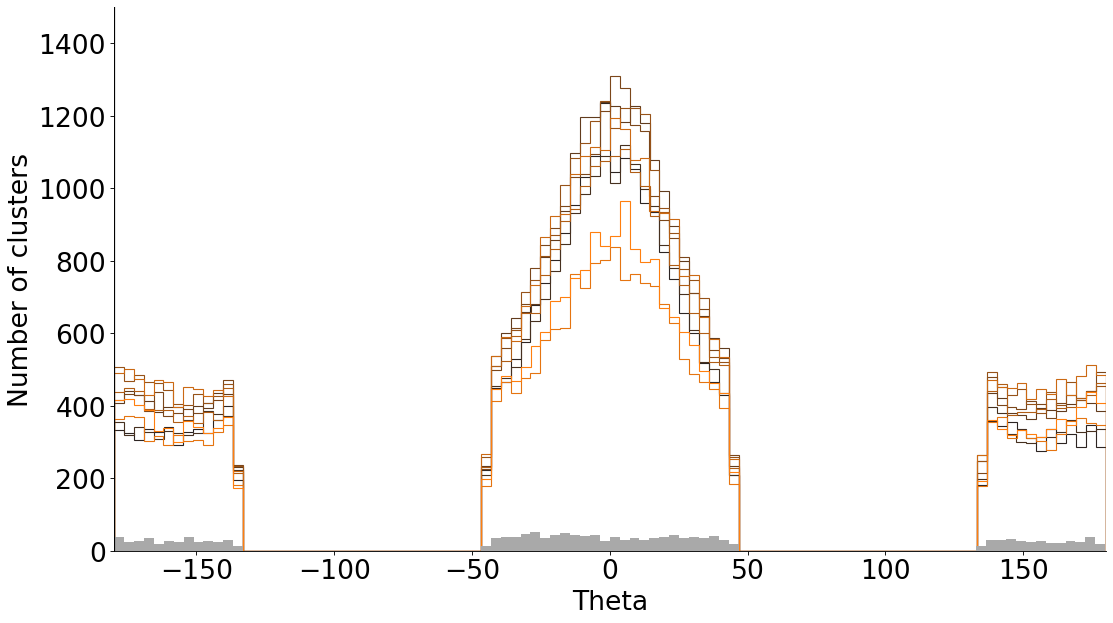

To determine the RoI, 0 clusters were eliminated.


In [ ]:
#@title **Theta**

#@markdown Looks like there is nothing to cut here

roi = cut_roi(roi, 'Theta', 100, 180, -180, 1500, -180, 180)

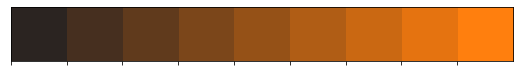

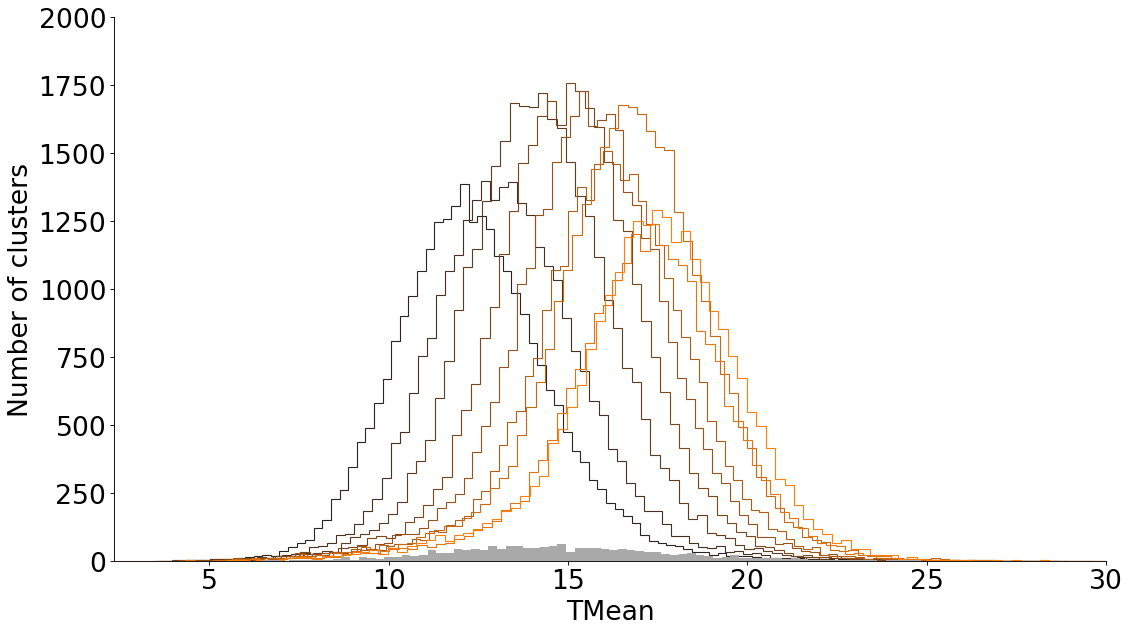

To determine the RoI, 31 clusters were eliminated.


In [ ]:
#@title **TMean**

#@markdown Looks like there is nothing to cut here

roi = cut_roi(roi, 'TMean', 100, 30, 0, 2000, 0, 30)

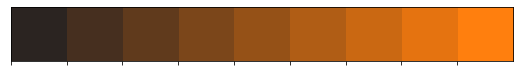

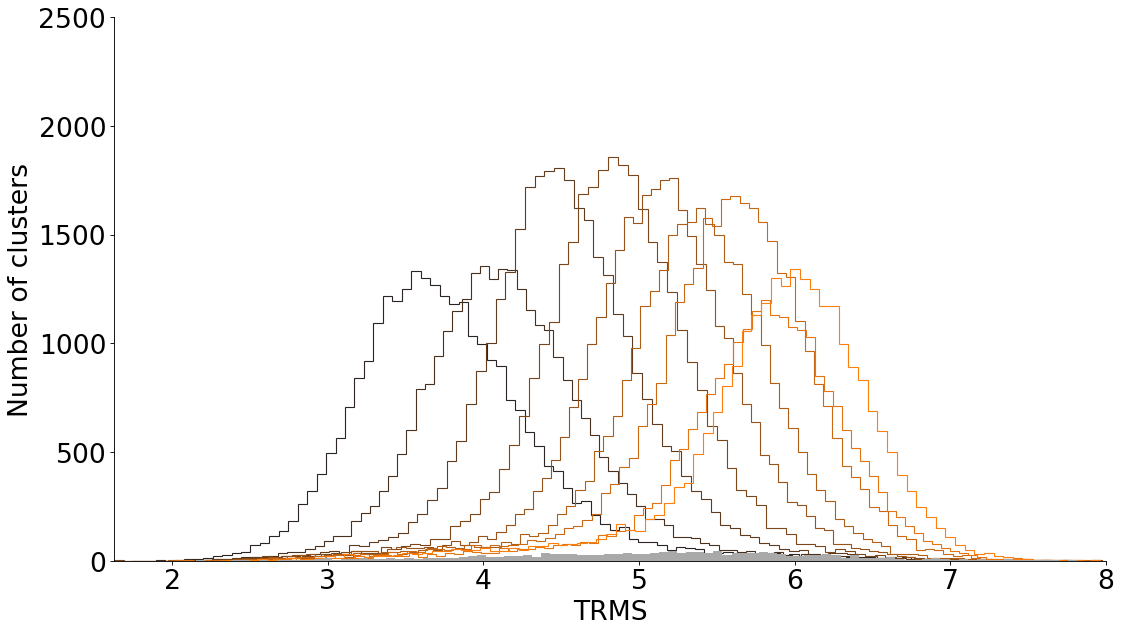

To determine the RoI, 74 clusters were eliminated.


In [ ]:
#@title **TRMS**

#@markdown The surviving clusters have a transversal RMS between 2 and 8.

roi = cut_roi(roi, 'TRMS', 100, 8, 0, 2500, 2, 8)

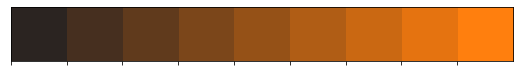

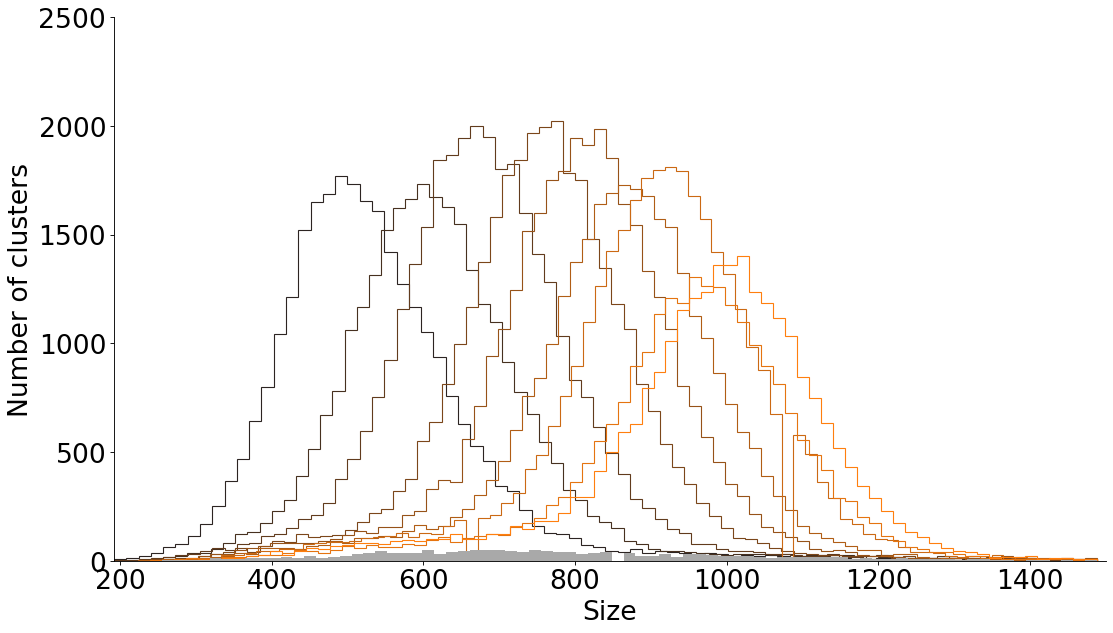

To determine the RoI, 401 clusters were eliminated.


In [ ]:
#@title **Size**

#@markdown The surviving clusters have a size between 230 and 1500.

roi = cut_roi(roi, 'Size', 80, 1500, 50, 2500, 230, 1500)

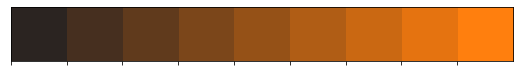

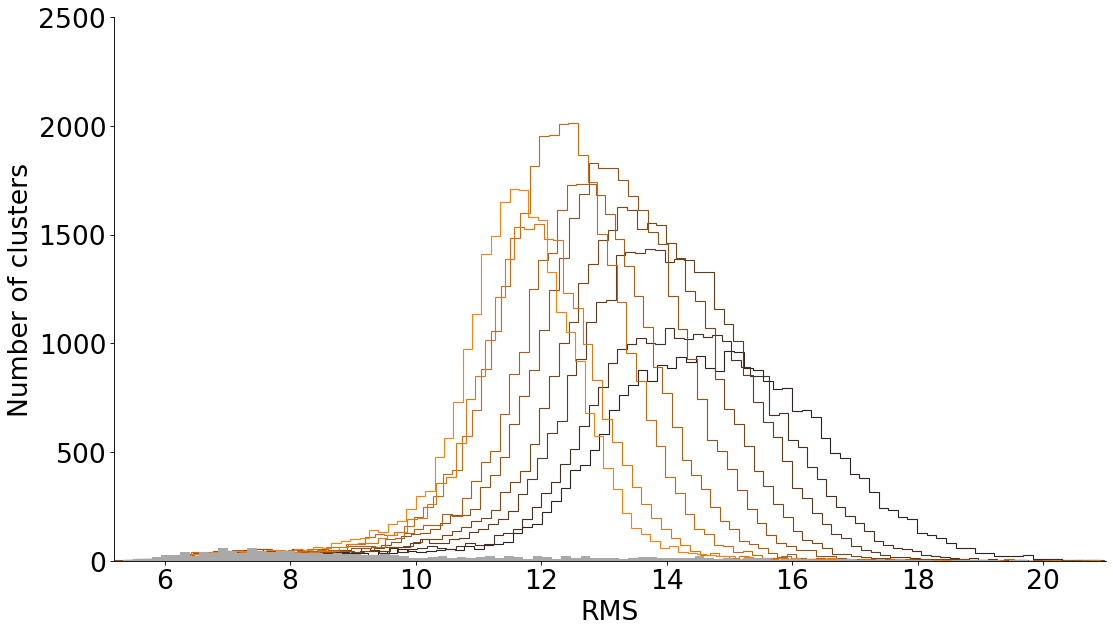

To determine the RoI, 4577 clusters were eliminated.


In [ ]:
#@title **RMS**

#@markdown The surviving clusters have a RMS between 8 and 21.

roi = cut_roi(roi, 'RMS', 100, 21, 0, 2500, 8, 21)

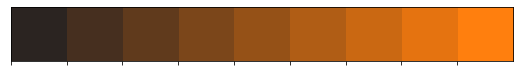

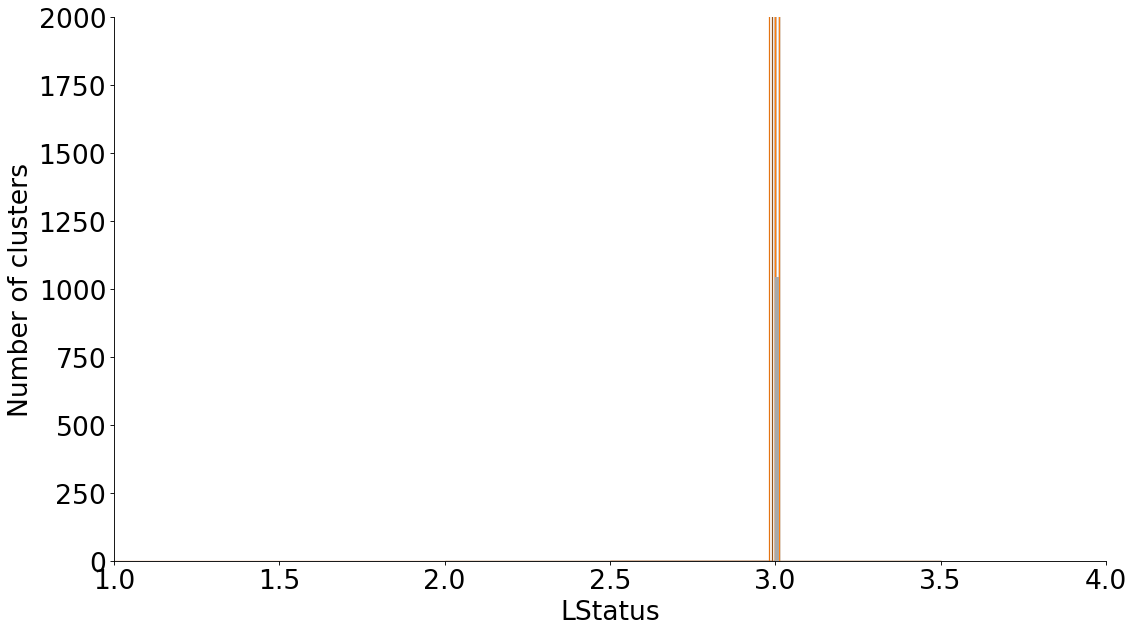

To determine the RoI, 4 clusters were eliminated.


In [ ]:
#@title **LStatus**

#@markdown Only the clusters with this value at 3 were correctly fitted to a Gaussian Function.

roi = cut_roi(roi, 'LStatus', 100, 4, 0, 2000, 2.5, 3.5)

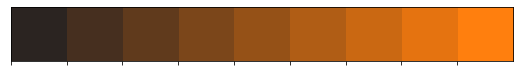

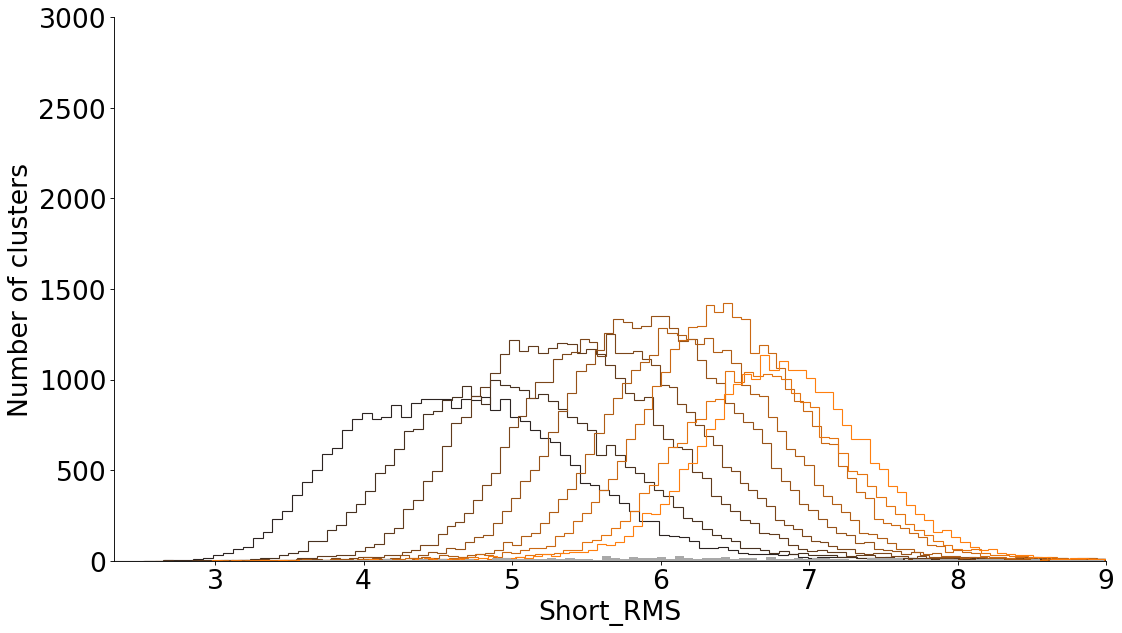

To determine the RoI, 2912 clusters were eliminated.


In [ ]:
#@title **Short RMS**

#@markdown The surviving clusters have a Short RMS between 2 and 9.

roi = cut_roi(roi, 'Short_RMS', 100, 9, 0, 3000, 2, 9)

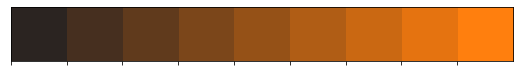

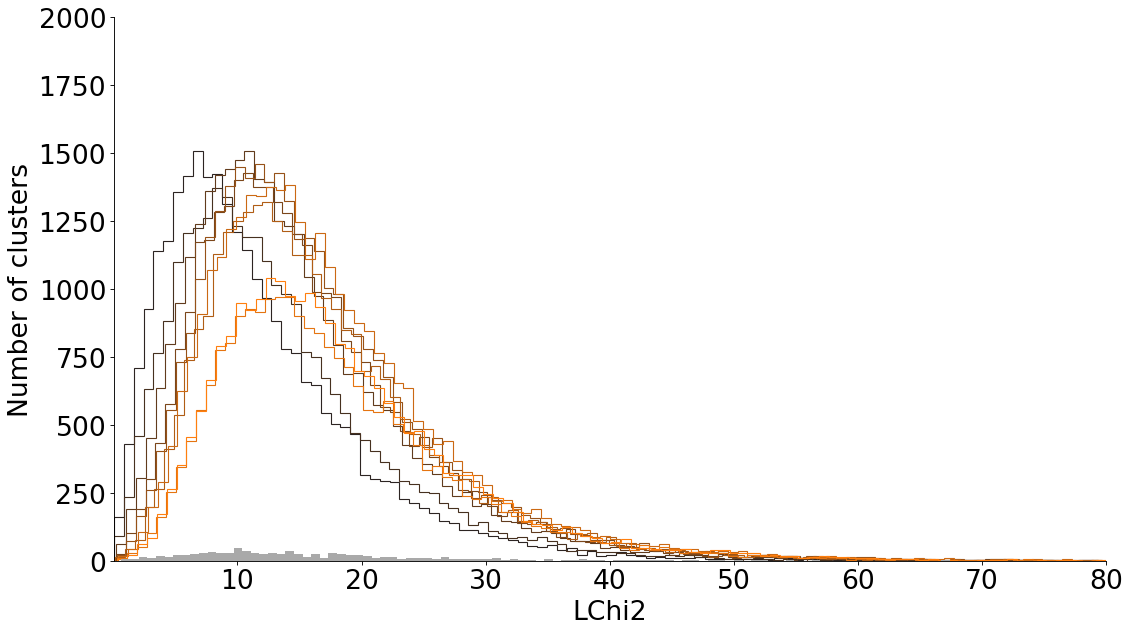

To determine the RoI, 236 clusters were eliminated.


In [ ]:
#@title **LChi2**

#@markdown The surviving clusters have a LChi2 between 0 and 80.

roi = cut_roi(roi, 'LChi2', 100, 80, 0, 2000, 0, 80)

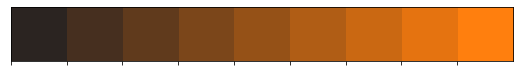

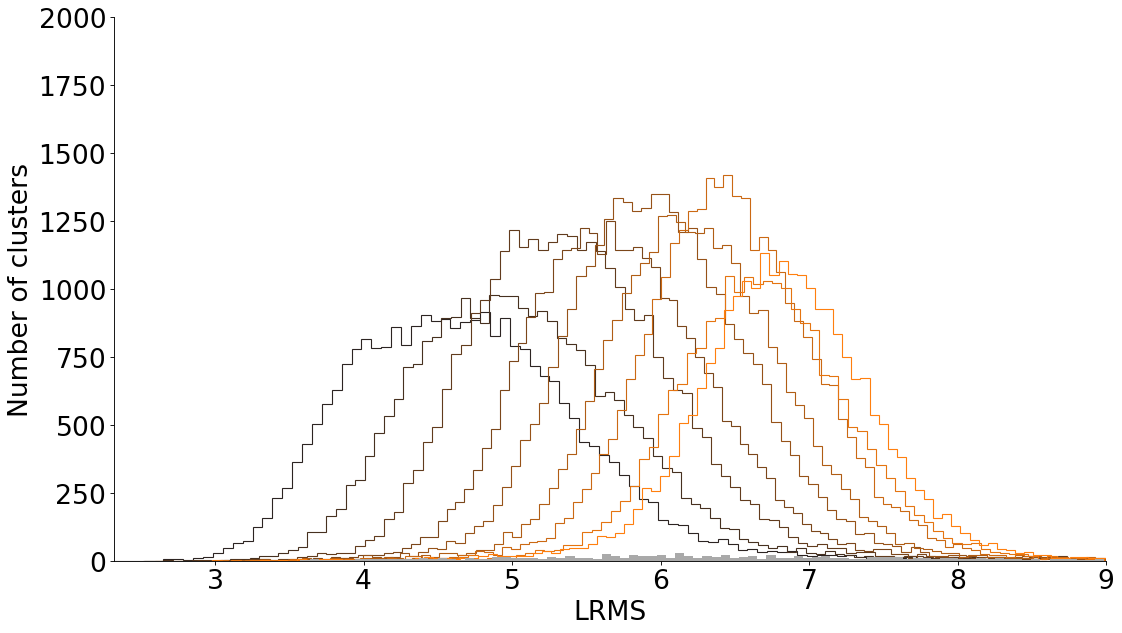

To determine the RoI, 0 clusters were eliminated.


In [ ]:
#@title **LRMS**

#@markdown The surviving clusters have a LChi2 between 2 and 9.

roi = cut_roi(roi, 'LRMS', 100, 9, 0, 2000, 2, 9)

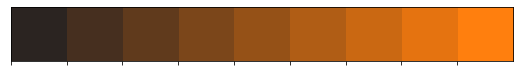

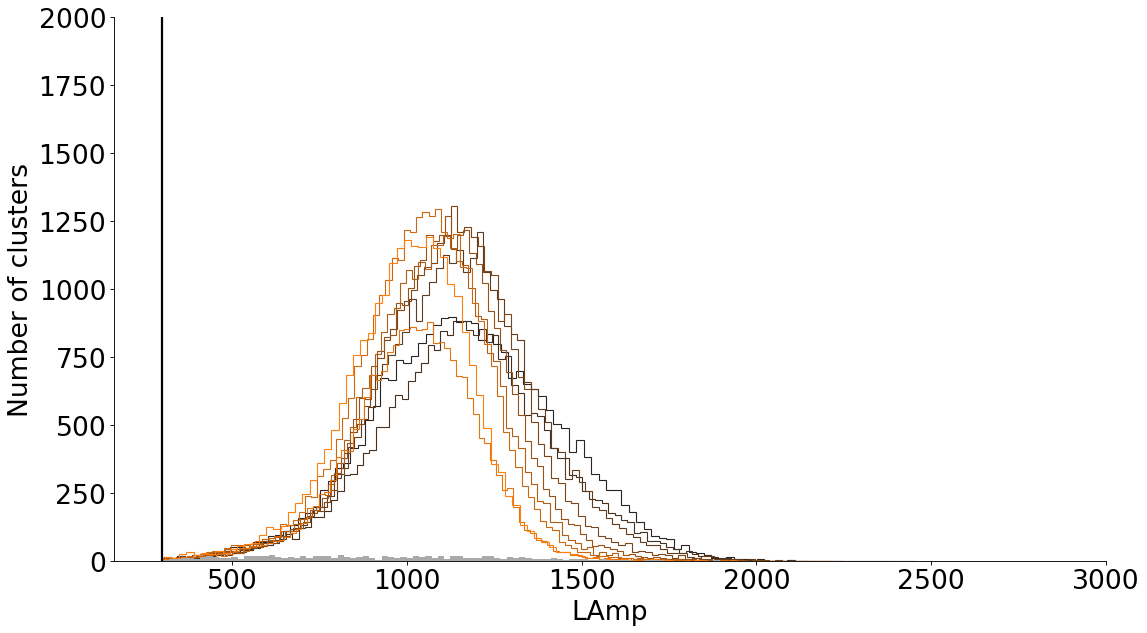

To determine the RoI, 309 clusters were eliminated.


In [ ]:
#@title **LAmp**

#@markdown The surviving clusters have a LAmp between 300 and 2000.

roi = cut_roi(roi, 'LAmp', 100, 3000, 300, 2000, 300, 2000)

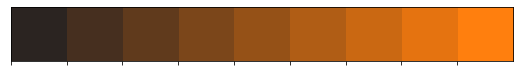

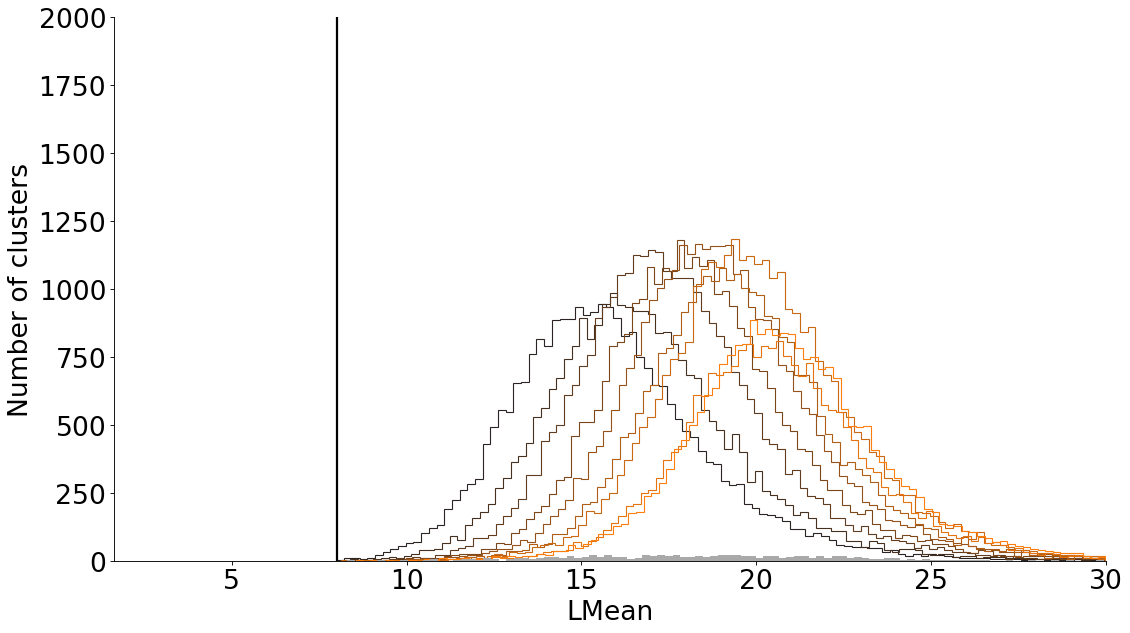

To determine the RoI, 920 clusters were eliminated.


In [ ]:
#@title **LMean**

#@markdown The surviving clusters have a LMean between 8 and 30.

roi = cut_roi(roi, 'LMean', 100, 30, 8, 2000, 8, 30)

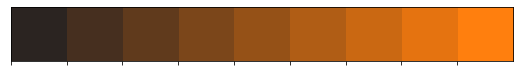

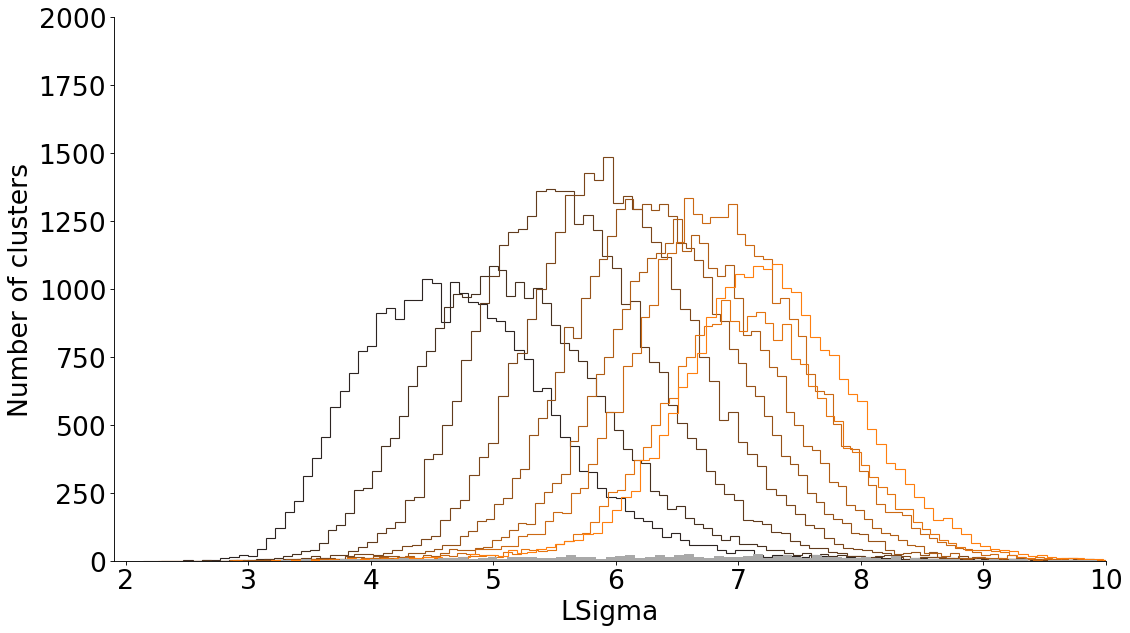

To determine the RoI, 251 clusters were eliminated.


In [ ]:
#@title **LSigma**
#@markdown The surviving clusters have a LSigma between 2.5 and 10.

roi = cut_roi(roi, 'LSigma', 100, 10, 0, 2000, 2.5, 10)

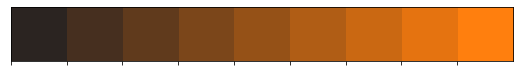

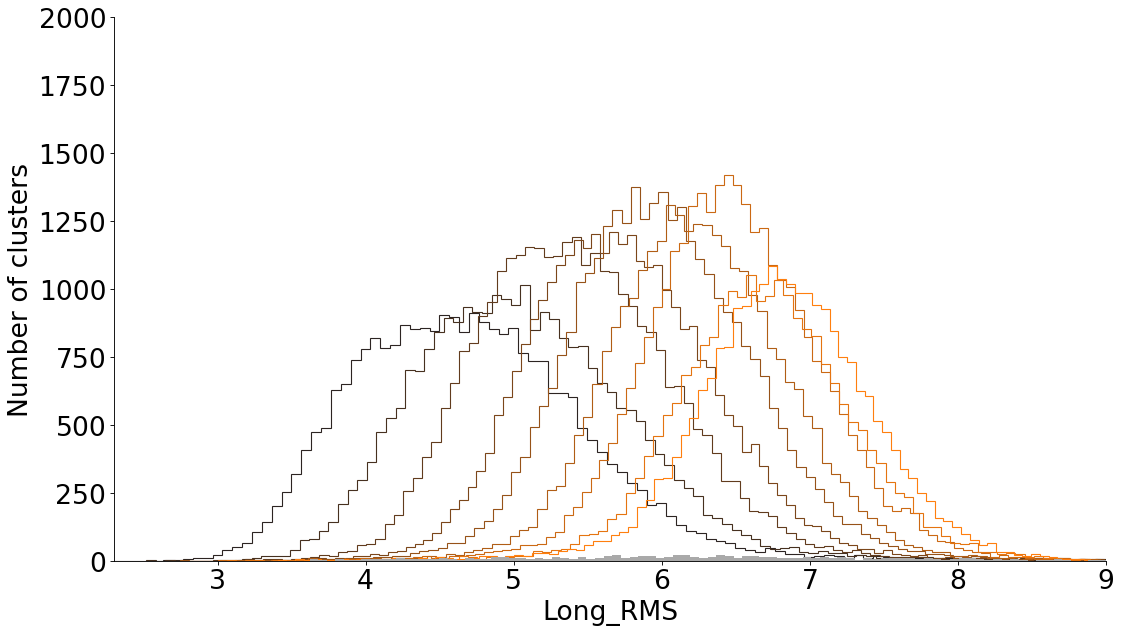

To determine the RoI, 21 clusters were eliminated.


In [ ]:
#@title **Long RMS**

#@markdown The surviving clusters have a Long RMS between 2 and 9.

roi = cut_roi(roi, 'Long_RMS', 100, 9, 2, 2000, 2, 9)

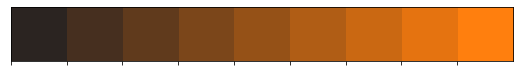

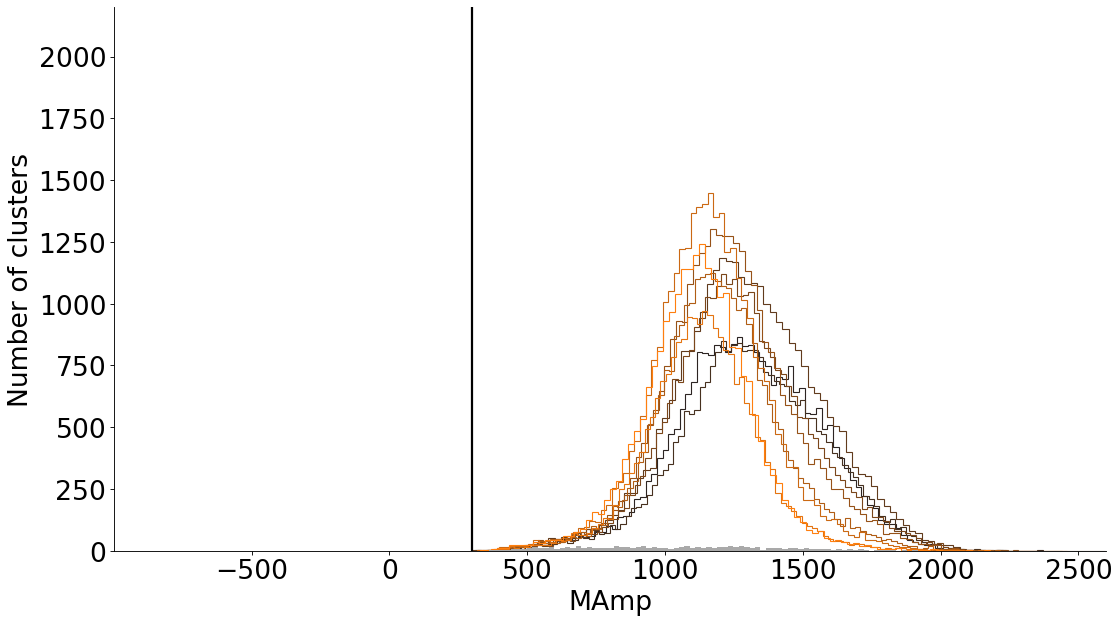

To determine the RoI, 1470 clusters were eliminated.


In [ ]:
#@title **Mean Amplitude**

#@markdown The surviving clusters have a MAmp between 300 and 2100.

roi = cut_roi(roi, 'MAmp', 100, 2600, 300, 2200, 300, 2100)

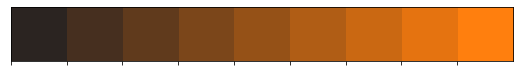

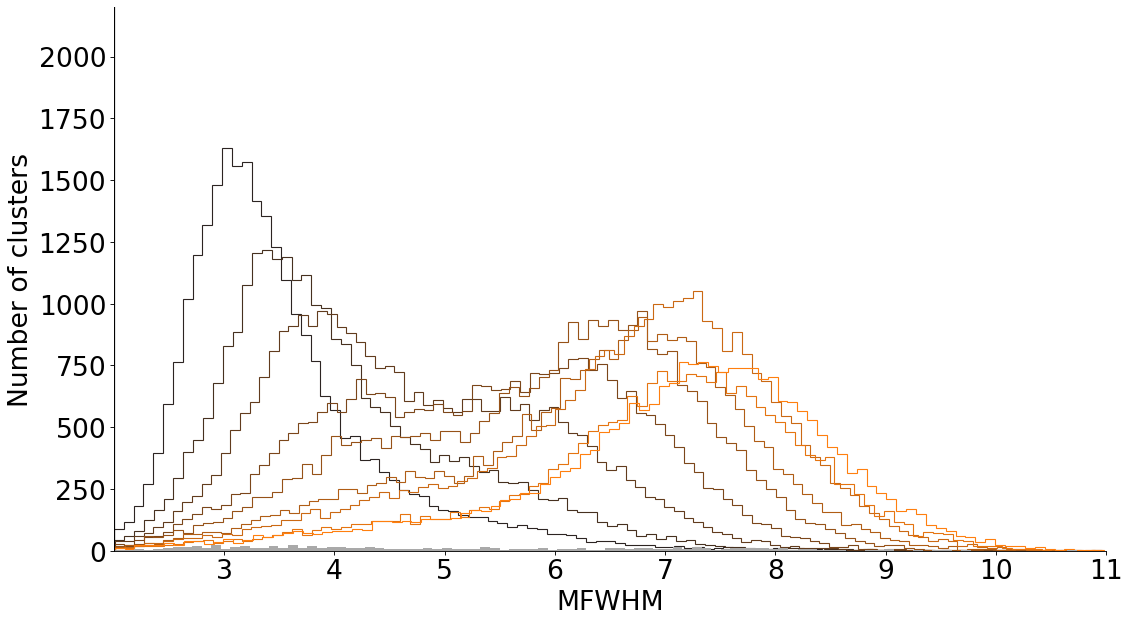

To determine the RoI, 67 clusters were eliminated.


In [ ]:
#@title **Mean FWHM**

#@markdown The surviving clusters have a longitudinal FWHN between 2 and 11.

roi = cut_roi(roi, 'MFWHM', 100, 11, 2, 2200, 2, 11)

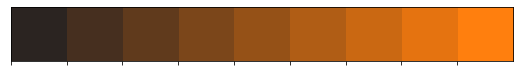

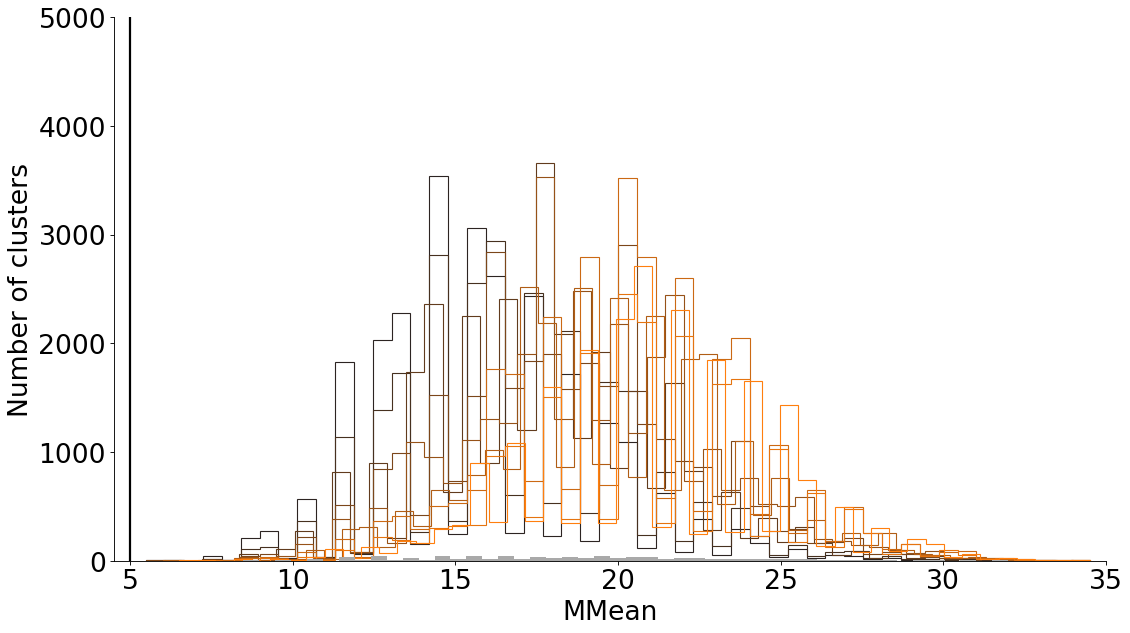

To determine the RoI, 26 clusters were eliminated.


In [ ]:
#@title **MMean**
#@markdown The surviving clusters have a MMean between 5 and 35.

roi = cut_roi(roi, 'MMean', 50, 35, 5, 5000, 5, 35)

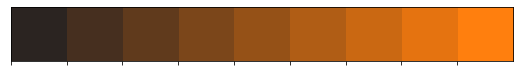

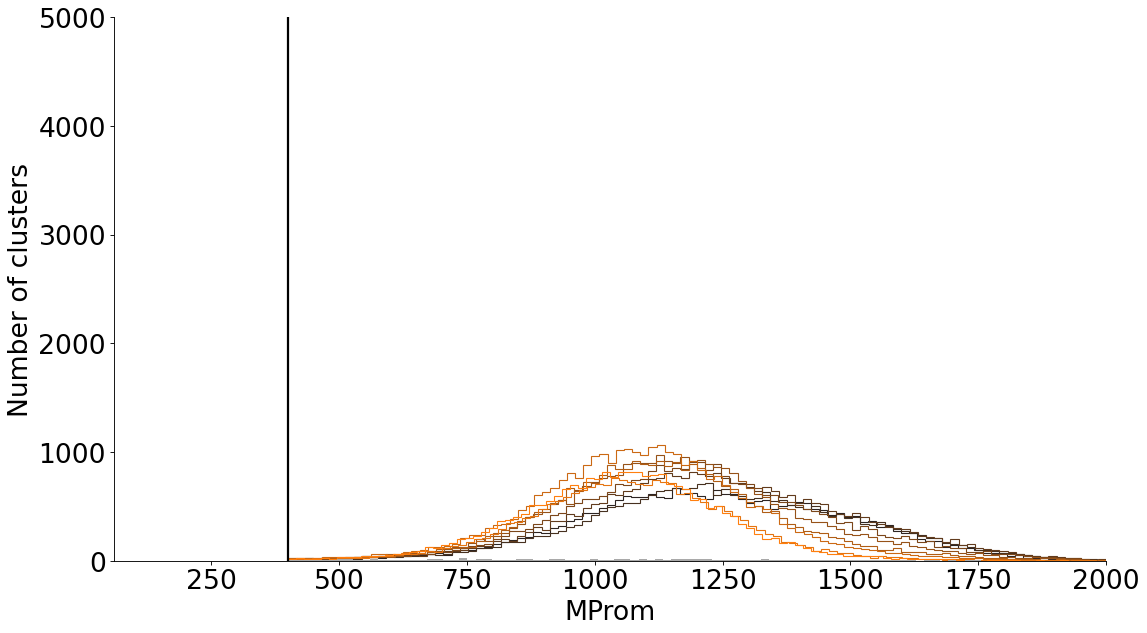

To determine the RoI, 733 clusters were eliminated.


In [ ]:
#@title **MProm**

#@markdown The surviving clusters have a MProm between 400 and 2000.

roi = cut_roi(roi, 'MProm', 100, 2000, 400, 5000, 400, 2000)

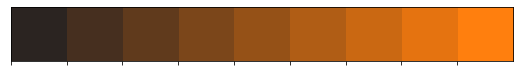

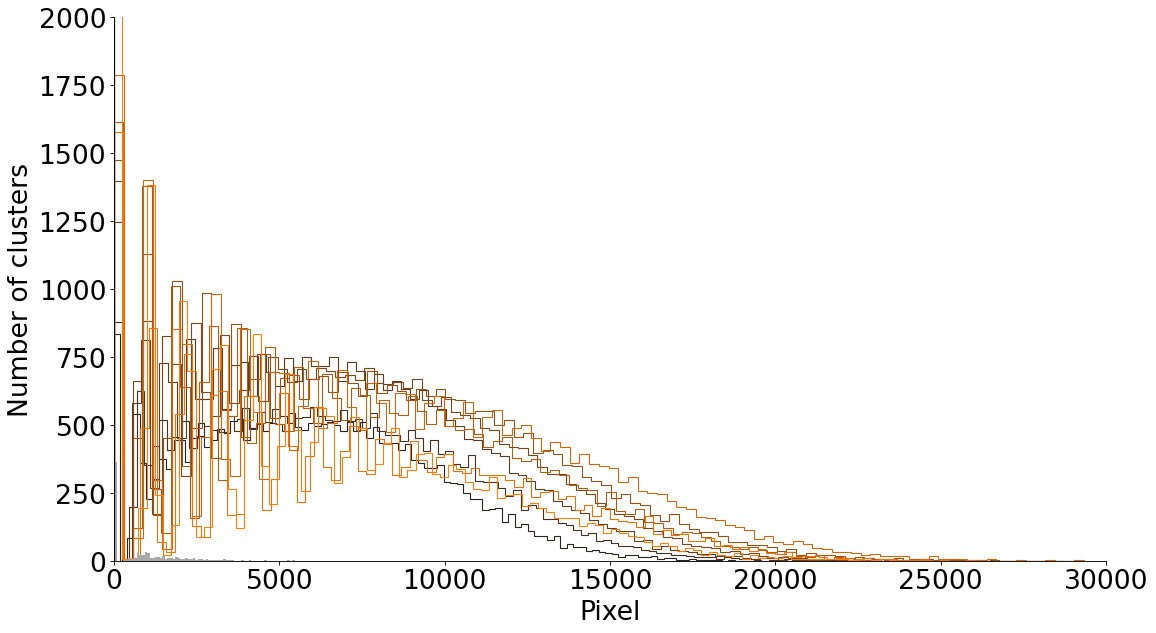

To determine the RoI, 1726 clusters were eliminated.


In [ ]:
#@title **Pixel**

#@markdown The surviving clusters have a MProm between 0 and 30000.

roi = cut_roi(roi, 'Pixel', 100, 30000, -2, 2000, 0, 30000)

# Evaluation

In [ ]:
#@title Compression ratio
print('The DoI size is', round(roi.shape[0]/sc.shape[0]*100,1), '% of the original super-clusters dataframe.')
roi.to_csv('/content/drive/MyDrive/LIME/roi.csv', index=False)

The DoI size is 19.6 % of the original super-clusters dataframe.
